In [29]:
#필요한 모듈 모두 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os

In [3]:
#셔플까지 완료된 기사 데이터 불러오기
data=pd.read_csv('/home/u1009/schtm_osy_lsm_kjh/Data_Ready/data/Article_shuffled.csv',header= None, names = ['data', 'label'], encoding='utf-8')

In [4]:
data

,data,label
0,정부 유행 우려 지역 선정 위험군 전수 검사 맞춤 강화 중앙재난안전대책본부 중대 본...,2
1,김용호 경희대 평화 복지 대학원 특 임 교수 개천절 집회 풍경 시민 자율 먹칠 외교...,0
2,국민 안전 민노총 권리 국민 힘 김종인 비대 위원장 유행 시작 전문가 의견 속출 정...,2
3,추석 선물 마음 추석 포 장재 아이스 팩 게 환경 걱정 추석 쓰레기 재활용 해 용품...,2
4,중앙 대책 본부 추석 연휴 마지막 날인 기준 국내 신종 감염증 신규 확진 누적 가운...,0
...,...,...
1096,도널드 트럼프 미국 대통령 로이터 뉴스 신종 감염증 치료 병원 입원 도널드 트럼프 ...,0
1097,신종 기관 마스크 공급 업체 시간 예외 허용 연장 근로 사용 고용 노동부 마스크 조...,2
1098,오후 서울 영등포구 여의도공원 앞 전국 노동자 대회 전국민주노동조합총연맹 민주노총 ...,1
1099,팬 온라인 응원 부대 검사 예정 배우 박보검 경남 창원시 진해 해군 교육사령부 입대...,0


In [5]:
#데이터 정보 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1101 entries, 0 to 1100
Data columns (total 2 columns):
data     1101 non-null object
label    1101 non-null object
dtypes: object(2)
memory usage: 17.3+ KB


In [6]:
#Null 값을 가진 샘플이 있는지 확인
data.isnull().values.any()

False

In [7]:
#이상한 값이 들어간 경우
data[data['label']=='label']

,data,label
230,data,label


In [8]:
#1000번째 해당 데이터 행 삭제
#이상한 데이터 존재했었음
data = data.drop(230)

In [9]:
#중복 데이터 확인
data['data'].nunique(), data['label'].nunique()  #1100행 중 1097개가 unique데이터

(1097, 3)

In [10]:
data

,data,label
0,정부 유행 우려 지역 선정 위험군 전수 검사 맞춤 강화 중앙재난안전대책본부 중대 본...,2
1,김용호 경희대 평화 복지 대학원 특 임 교수 개천절 집회 풍경 시민 자율 먹칠 외교...,0
2,국민 안전 민노총 권리 국민 힘 김종인 비대 위원장 유행 시작 전문가 의견 속출 정...,2
3,추석 선물 마음 추석 포 장재 아이스 팩 게 환경 걱정 추석 쓰레기 재활용 해 용품...,2
4,중앙 대책 본부 추석 연휴 마지막 날인 기준 국내 신종 감염증 신규 확진 누적 가운...,0
...,...,...
1096,도널드 트럼프 미국 대통령 로이터 뉴스 신종 감염증 치료 병원 입원 도널드 트럼프 ...,0
1097,신종 기관 마스크 공급 업체 시간 예외 허용 연장 근로 사용 고용 노동부 마스크 조...,2
1098,오후 서울 영등포구 여의도공원 앞 전국 노동자 대회 전국민주노동조합총연맹 민주노총 ...,1
1099,팬 온라인 응원 부대 검사 예정 배우 박보검 경남 창원시 진해 해군 교육사령부 입대...,0


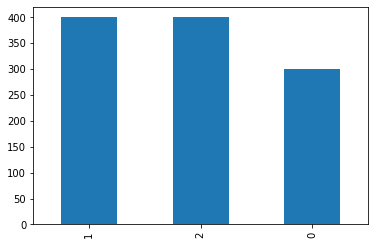

In [11]:
#label 분포 시각화
data['label'].value_counts().plot(kind='bar');

In [12]:
#label 갯수 알아보기
print(data.groupby('label').size().reset_index(name='count'))

  label  count
0     0    300
1     1    400
2     2    400


In [13]:
X_data = data['data']
y_data = data['label']
print('기사 본문의 개수: {}'.format(len(X_data)))
print('레이블의 개수: {}'.format(len(y_data)))

기사 본문의 개수: 1100
레이블의 개수: 1100


In [14]:
X_data

0       정부 유행 우려 지역 선정 위험군 전수 검사 맞춤 강화 중앙재난안전대책본부 중대 본...
1       김용호 경희대 평화 복지 대학원 특 임 교수 개천절 집회 풍경 시민 자율 먹칠 외교...
2       국민 안전 민노총 권리 국민 힘 김종인 비대 위원장 유행 시작 전문가 의견 속출 정...
3       추석 선물 마음 추석 포 장재 아이스 팩 게 환경 걱정 추석 쓰레기 재활용 해 용품...
4       중앙 대책 본부 추석 연휴 마지막 날인 기준 국내 신종 감염증 신규 확진 누적 가운...
                              ...                        
1096    도널드 트럼프 미국 대통령 로이터 뉴스 신종 감염증 치료 병원 입원 도널드 트럼프 ...
1097    신종 기관 마스크 공급 업체 시간 예외 허용 연장 근로 사용 고용 노동부 마스크 조...
1098    오후 서울 영등포구 여의도공원 앞 전국 노동자 대회 전국민주노동조합총연맹 민주노총 ...
1099    팬 온라인 응원 부대 검사 예정 배우 박보검 경남 창원시 진해 해군 교육사령부 입대...
1100    노영민 대통령 비서실장 추미애 법무부 장관 아들 서 모 군 복무 휴가 미 복귀 의혹...
Name: data, Length: 1100, dtype: object

In [15]:
#tokenizer 관련 모듈 불러오기
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [16]:
#총 14030중 절반인 빈도 상위 7015개 단어만 사용
vocab_size = 7015
tokenizer = Tokenizer(num_words = vocab_size + 1) # 상위 150개 단어만 사용
tokenizer.fit_on_texts(X_data) # corona의 각 행에 토큰화를 수행
sequences = tokenizer.texts_to_sequences(X_data) # 단어를 숫자값, 인덱스로 변환하여 저장

In [17]:
print(sequences[:1])

[[3, 41, 72, 12, 1289, 1387, 1202, 18, 1572, 46, 549, 351, 415, 50, 54, 43, 2, 10, 543, 233, 12, 13, 170, 72, 12, 909, 3621, 819, 1289, 41, 72, 12, 13, 11, 15, 23, 1203, 1387, 1202, 18, 163, 128, 41, 5, 837, 1487, 807, 783, 459, 104, 17, 49, 104, 135, 17, 5376, 456, 302, 411, 3, 39, 54, 20, 257, 60, 2975, 60, 43, 2, 172, 742, 76, 1050, 997, 2, 6, 3, 257, 60, 54, 43, 2, 10, 17, 2, 104, 796, 84, 2210, 456, 2, 184, 57, 580, 85, 374, 449, 1987, 31, 590, 18, 1988, 2059, 268, 195, 26, 17, 635, 176, 3935, 1070, 1761, 1159, 317, 1619, 520, 167, 77, 1864, 257, 60, 26, 1806, 16, 113, 2673, 114, 1518, 160, 2, 711, 233, 3, 122, 20, 12, 257, 60, 2674, 854, 273, 1865, 398, 129, 635, 910, 18, 84, 233, 909, 3621, 819, 1202, 18, 75, 302, 411, 128, 75, 66, 257, 60, 2060, 218, 2527, 450, 764, 120, 2, 17, 2060, 712, 2211, 218, 107, 257, 60, 320, 2, 51, 6129, 257, 17, 2674, 2975, 60, 635, 6130, 171, 635, 559, 57, 2976, 580, 3404, 1488, 241, 688, 17, 2977, 635, 251, 257, 60, 228, 26, 1121, 51, 130]]


In [18]:
#단어와 빈도인덱스 매치하여 확인
word_to_index = tokenizer.word_index
print(word_to_index)

{'확진': 1, '감염': 2, '정부': 3, '국민': 4, '상황': 5, '확산': 6, '관련': 7, '대통령': 8, '말': 9, '발생': 10, '거리': 11, '지역': 12, '사회': 13, '단계': 14, '두기': 15, '환자': 16, '시설': 17, '검사': 18, '마스크': 19, '수도권': 20, '다': 21, '서울': 22, '조치': 23, '백신': 24, '집회': 25, '경우': 26, '니다': 27, '일': 28, '때': 29, '대응': 30, '사람': 31, '당국': 32, '북한': 33, '경제': 34, '이번': 35, '이후': 36, '조사': 37, '신규': 38, '대책': 39, '교회': 40, '유행': 41, '교수': 42, '집단': 43, '미국': 44, '지원': 45, '강화': 46, '문제': 47, '의료': 48, '추가': 49, '오늘': 50, '관리': 51, '격리': 52, '국가': 53, '최근': 54, '신종': 55, '한국': 56, '수칙': 57, '국내': 58, '필요': 59, '병원': 60, '안전': 61, '시간': 62, '세계': 63, '감염증': 64, '이날': 65, '전국': 66, '규모': 67, '이상': 68, '위기': 69, '의원': 70, '사실': 71, '우려': 72, '확인': 73, '생각': 74, '진행': 75, '모임': 76, '운영': 77, '접촉': 78, '착용': 79, '회의': 80, '추석': 81, '판정': 82, '기준': 83, '결과': 84, '사례': 85, '힘': 86, '문': 87, '뉴스': 88, '강조': 89, '곳': 90, '연휴': 91, '입': 92, '말씀': 93, '기간': 94, '이다': 95, '활동': 96, '지금': 97, '중국': 98, '설명': 99, '수능': 100, '가운데': 101,

In [19]:
#데이터 내 단어 빈도수 현황 확인
threshold = 2
total_cnt = len(word_to_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합(vocabulary)에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

등장 빈도가 1번 이하인 희귀 단어의 수: 4657
단어 집합(vocabulary)에서 희귀 단어의 비율: 33.19315751960086
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 1.8175006146797228


In [20]:
vocab_size = len(word_to_index) + 1
print('단어 집합의 크기: {}'.format((vocab_size)))

단어 집합의 크기: 14031


In [21]:
n_of_train = int(len(sequences) * 0.8)
n_of_test = int(len(sequences) - n_of_train)
print('훈련 데이터의 개수 :',n_of_train)
print('테스트 데이터의 개수:',n_of_test)

훈련 데이터의 개수 : 880
테스트 데이터의 개수: 220


기사의 최대 길이 : 2075
기사의 평균 길이 : 224.171818


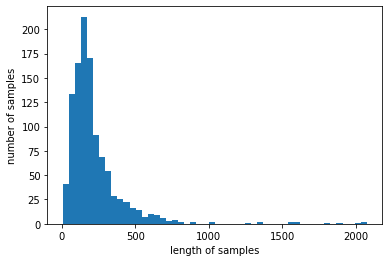

In [22]:
X_data = sequences
print('기사의 최대 길이 : %d' % max(len(l) for l in X_data))
print('기사의 평균 길이 : %f' % (sum(map(len, X_data))/len(X_data)))
plt.hist([len(s) for s in X_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [23]:
set_len = 500 #평균이 224이고 500정도까지 분포가 많은 것으로 판단하여 500으로 패딩 길이 잡음
# 전체 데이터셋의 길이는 max_len으로 맞춥니다.
data = pad_sequences(X_data, maxlen = set_len)
print("훈련 데이터의 크기(shape): ", data.shape)

훈련 데이터의 크기(shape):  (1100, 500)


In [24]:
data

array([[   0,    0,    0, ..., 1121,   51,  130],
       [   0,    0,    0, ...,  220, 1992,  375],
       [   0,    0,    0, ...,  471,  689, 1101],
       ...,
       [   0,    0,    0, ...,  192,  105, 1765],
       [   0,    0,    0, ...,   95,    9,   95],
       [   0,    0,    0, ..., 4833, 5482, 1348]], dtype=int32)

In [30]:
#패딩처리된 data를 array로 저장
np.save('/home/u1009/schtm_osy_lsm_kjh/Data_Ready/data/X_data', data)

In [38]:
#y_data는 데이터프레임으로 저장
y_data=pd.DataFrame(y_data,columns=['label'])
y_data.to_csv('/home/u1009/schtm_osy_lsm_kjh/Data_Ready/data/y_data',index=None)

In [39]:
pd.read_csv('/home/u1009/schtm_osy_lsm_kjh/Data_Ready/data/y_data')

,label
0,2
1,0
2,2
3,2
4,0
...,...
1095,0
1096,2
1097,1
1098,0
